# Emotion Detection

### Load The Datasets

In [0]:
# import libraries
import h5py
import numpy as np
np.random.seed(1337)

In [0]:
# training dataset
train_dataset=h5py.File("train_happy.h5","r")
train_x_o =np.array(train_dataset["train_set_x"][:])
train_x =train_x_o/255.0
train_y =np.array(train_dataset["train_set_y"][:])
train_y =train_y.reshape((1,train_y.shape[0]))
train_y =train_y.T

In [0]:
# testing dataset
test_dataset=h5py.File("test_happy.h5","r")
test_x_o =np.array(test_dataset["test_set_x"][:])
test_x =test_x_o/255.0
test_y =np.array(test_dataset["test_set_y"][:])
test_y =test_y.reshape((1,test_y.shape[0]))
test_y =test_y.T

### Visualise The Images

0


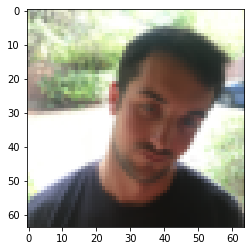

In [0]:
import matplotlib.pyplot as plt
index=0
plt.imshow(train_x_o[index])
print(train_y[index][0])

1


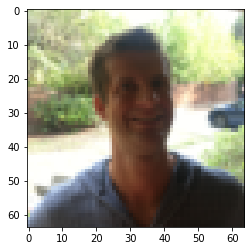

In [0]:
index=1
plt.imshow(train_x_o[index])
print(train_y[index][0])

### Step-1 ) Create The Model

In [0]:
from keras import layers
from keras.models import Model
from keras.layers import Activation,Flatten,Input ,Dropout# Core Layers
from keras.layers import MaxPooling2D,Conv2D,ZeroPadding2D,BatchNormalization,Dense # Con

In [0]:
def MyModel1(input_shape):
  X_input=Input(input_shape) # Placeholder for the image

  X=ZeroPadding2D((3,3))(X_input) # Apply padding to the image

  X=Conv2D(6,(5,5),strides=(1,1),name='conv0')(X) # 32 7*7 Filters with stride of 1
  X=BatchNormalization(axis=3,name='bn0')(X) # BatchNormalisation 
  X=Activation('relu')(X) # Relu activation used
  X=MaxPooling2D((2,2),name='max_pool0')(X) # MaxPooling

  X=Conv2D(16,(5,5),strides=(1,1),name='conv1')(X) # 32 7*7 Filters with stride of 1
  X=BatchNormalization(axis=3,name='bn1')(X) # BatchNormalisation 
  X=Activation('relu')(X) # Relu activation used
  X=MaxPooling2D((2,2),name='max_pool1')(X) # MaxPooling 

  X=Flatten()(X)  # Flatten as so apply Dense layers now
  X=Dense(128,activation='relu',name='fc0')(X)
  X=Dropout(0.5)(X)

  X=Dense(64,activation='relu',name='fc1')(X)
  X=Dropout(0.5)(X)

  X=Dense(1,activation='sigmoid',name='fc2')(X) # final layer with one unit

  model= Model(inputs=X_input,outputs=X,name='happymodel') # model
  return model
  


In [0]:
mymodel1=MyModel1(train_x.shape[1:])

In [0]:
mymodel1.summary()

Model: "happymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 66, 66, 6)         456       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 66, 66, 6)         24        
_________________________________________________________________
activation_5 (Activation)    (None, 66, 66, 6)         0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 33, 33, 6)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 29, 29, 16)        2

### Step-2 ) Compile The Model

In [0]:
mymodel1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Configures the model for training 

### Step-3 ) Fit The Model

In [0]:
mymodel1.fit(train_x,train_y,epochs=20,batch_size=32)

Epoch 1/20
600/600 [==============================] - 4s 7ms/step - loss: 1.0070 - acc: 0.5583
Epoch 2/20
600/600 [==============================] - 3s 6ms/step - loss: 0.7536 - acc: 0.5917
Epoch 3/20
600/600 [==============================] - 3s 6ms/step - loss: 0.5707 - acc: 0.6883
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.4496 - acc: 0.7817
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.3684 - acc: 0.8283
Epoch 6/20
600/600 [==============================] - 3s 6ms/step - loss: 0.3058 - acc: 0.8617
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - loss: 0.2511 - acc: 0.9133
Epoch 8/20
600/600 [==============================] - 3s 6ms/step - loss: 0.2320 - acc: 0.9133
Epoch 9/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1886 - acc: 0.9283
Epoch 10/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1762 - acc: 0.9367
Epoch 11/20
600/600 [============================

### Step-3 ) Evaluate The Model

In [0]:
predictions=mymodel1.evaluate(test_x,test_y)

150/150 [==============================] - 1s 4ms/step


In [0]:
print("Performance Of Model 1")
print("Loss->   "+str(predictions[0]))
print("Accuracy->  "+str(predictions[1]))

Performance Of Model 1
Loss->   0.14267047862211862
Accuracy->  0.9533333309491475
